# A quick guide to Starlight toolkit

Here we will review the main features of the code, starting with the main one which is organizing the output from the huge fortranquenstine of ascii files generated by Starlight.

In [3]:
from starlight_toolkit.output import read_output_file

starlight_output = read_output_file('../test_data/NGC_0855_pho.out')

Where `NGC_0855_pho.out` is a fit to the spectra of the galaxy NGC 0855, including photometry from the ultraviolet to the near infrared.

This sample data can be found [here](https://github.com/arielwrl/starlight_toolkit/tree/master/test_data)

`starlight_output` is now a dictionary with the following keys:

In [9]:
starlight_output.keys()

dict_keys(['keywords', 'population', 'spectra', 'FIR', 'PHO'])

`keywords` contains a series of basic input, output and config information that you will find in the header of the Starlight output file.

Our main result, which is the spectral decomposition in stellar populations, is stored as an `astropy.Table()` in the `population` key of the dictionary.

In [11]:
starlight_output['population']

popx,popmu_ini,popmu_cor,popage_base,popZ_base,popfbase_norm,popexAV_flag,popMstars,aFe,p_chi2r,p_adev,p_AV,p_x,popAV_tot,popage_base_upp
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,0.0,0.0,1000000.0,0.0001,0.002432,0.0,1.0,0.0,14.582,11.4662,3.0,90.991,0.2721,1816070.0
0.0,0.0,0.0,1816070.0,0.0001,0.00734,0.0,0.9954,0.0,4.8753,6.7495,2.1964,98.246,0.2721,3298120.0
0.0,0.0,0.0,3298120.0,0.0001,0.007826,0.0,0.9529,0.0,4.0744,6.2554,2.4453,98.238,0.2721,5989620.0
0.0,0.0,0.0,5989620.0,0.0001,0.001832,0.0,0.8893,0.0,10.152,9.5844,3.0,92.857,0.2721,10877600.0
0.0,0.0,0.0,10877600.0,0.0001,0.001231,0.0,0.8392,0.0,7.114,7.8865,3.0,94.355,0.2721,19754500.0
0.0,0.0,0.0,19754500.0,0.0001,0.001052,0.0,0.7943,0.0,3.4063,5.2446,3.0,97.06,0.2721,35875500.0
0.0,0.0,0.0,35875500.0,0.0001,0.0008676,0.0,0.7512,0.0,2.367,4.582,2.9211,98.696,0.2721,65152500.0
0.0,0.0,0.0,65152500.0,0.0001,0.0007454,0.0,0.7122,0.0,2.5204,4.806,2.4453,97.944,0.2721,118322000.0
0.0,0.0,0.0,118322000.0,0.0001,0.0006055,0.0,0.669,0.0,2.6578,5.0369,2.0687,97.732,0.2721,214881000.0


The keys `spectra`, `FIR` and `PHO` contain the spectra (model and observed), FIR predictions and photometric information. For example, to know what are the model and observed magnitudes involved in the fit, you can access the following table.

In [11]:
starlight_output['PHO']

filter,magY_TOT,Yfrac2model,magYErr,magYRange,Chi2ScaleFactor,magY_obs,magY_low,magY_upp,MeanLamb,PivotLamb,StdDevLamb,q_MeanLamb,magY_mod,fY_obs,fY_mod,chi2_Y,Y_Perc
str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[112]
FUV,15.85,1.0,0.1,0.0,1.0,15.85,15.85,15.85,1521.93,1517.26,119.12,2.525,15.8168,2.159e-14,2.226e-14,0.11007,0.0 .. 0.0
NUV,15.22,1.0,0.1,0.0,1.0,15.22,15.22,15.22,2312.03,2297.03,260.27,2.0221,15.2776,1.682e-14,1.596e-14,0.33144,0.0 .. 0.0
z,11.89,1.0,0.05,0.0,1.0,11.89,11.89,11.89,8961.48,8946.7,525.46,0.5427,11.8841,2.382e-14,2.395e-14,0.013755,0.0 .. 0.0
J,11.73,1.0,0.05,0.0,1.0,11.73,11.73,11.73,12410.37,12392.97,653.81,0.331,11.7129,1.439e-14,1.461e-14,0.11732,0.0 .. 0.0
H,11.59,1.0,0.05,0.0,1.0,11.59,11.59,11.59,16513.41,16494.61,785.69,0.1943,11.5769,9.238e-15,9.351e-15,0.069001,0.0 .. 0.0
Ks,11.82,1.0,0.05,0.0,1.0,11.82,11.82,11.82,21656.1,21638.39,871.96,0.0961,11.8389,4.343e-15,4.268e-15,0.14337,0.0 .. 0.0


A simple toolbox for plotting results is provided by the `plotting` module. For example, the following code will plot the fitted spectra and photometry.

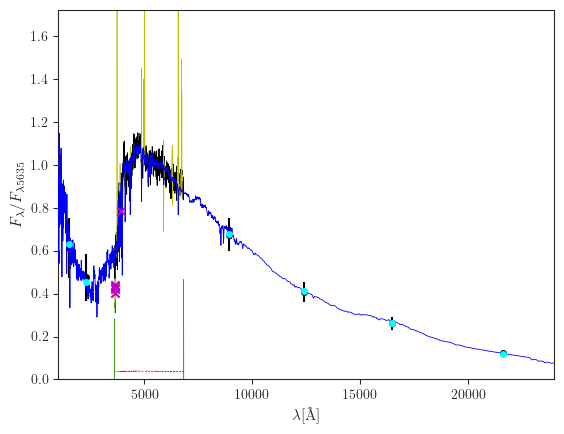

In [4]:
from starlight_toolkit.plotting import plot_spec

plot_spec(starlight_output)

The function also accepts a path to a starlight output file instead of the output dictionary.

You can also show the legend of the plot by setting `show_legend=True`. If this is set to `False`, the function still creates labels for each plot element, so you can show the legend independently using matplotlib for extra control.

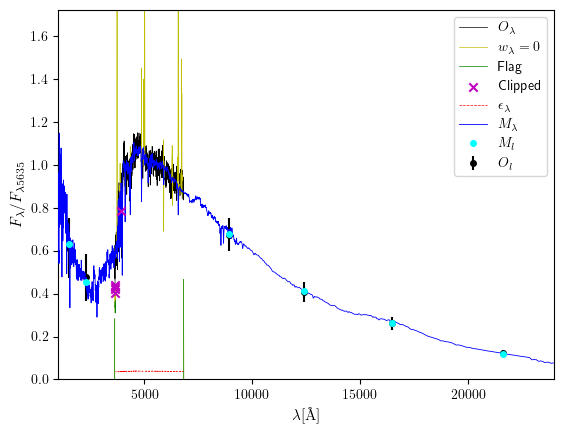

In [4]:
plot_spec(starlight_output, show_legend=True)

The wavelength range here is huge! That's due to all the photometric points, it might be interesting to look more closely at the spectral part to see if everything is ok.

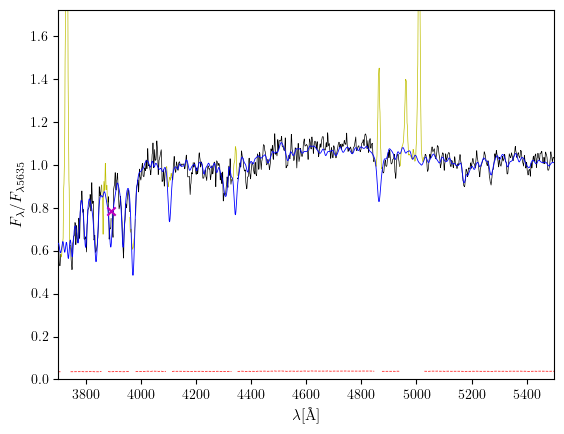

In [6]:
plot_spec(starlight_output, wl_range=[3700, 5500])

The `plot_spec` function has many options and it can be used as a building block for more complex figures, you can take a look at the docstrin.

In [6]:
plot_spec?

Signature:
plot_spec(
    out,
    ax=None,
    plot_obs=True,
    plot_syn=True,
    plot_error=True,
    plot_labels=True,
    obs_color='k',
    syn_color='b',
    syn_lw=0.6,
    obs_lw=0.5,
    w0_color='y',
    clip_color='m',
    flag_color='g',
    syn_label='$M_\\lambda$',
    plot_PHO=True,
    PHO_color='cyan',
    PHO_label='$M_l$',
    PHO_obs_label='$O_l$',
    wl_range=None,
    show_legend=False,
)
Docstring:
Plots the spectra and photometric information.

Parameters:
    out (str or dict): Either a Starlight output file name or a dictionary containing the extracted information
                       (output from `starlight_toolkit.output.read_output_file`).
    ax (matplotlib.axes.Axes, optional): The axis on which to plot the data. If None, the current axis is used. Defaults to None.
    plot_obs (bool, optional): Whether to plot the observed spectrum. Defaults to True.
    plot_syn (bool, optional): Whether to plot the synthetic spectrum. Defaults to True.
    plot_e

Note that there are many flavors of "ignored points", spectral regions might be masked, flagged or clipped. All of these have no weight in the final fit but they are excluded for different reasons, hence the different symbols. If you prefer to simplify things and put all of these in the same box, you can use the `plot_spec_simple` function.

We can also produce a full diagnostic plot with all the information you need to know how your fit went.

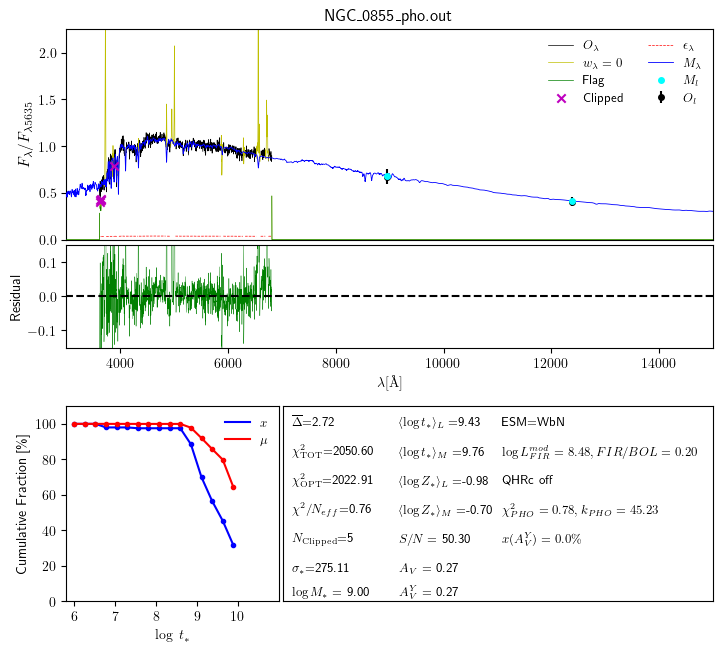

In [8]:
from starlight_toolkit.plotting import plot_fit_complete

ax_list = plot_fit_complete(starlight_output, wl_range=[3000, 15000])

We also provide functions to calculate reduced features from the population vectors. These features are in the `post_processing` module. For example, to calculate the mass-weighted age:

In [10]:
from starlight_toolkit.post_processing import calc_atmass

atmass = calc_atmass(starlight_output['population']['popage_base'], starlight_output['population']['popmu_ini'], starlight_output['population']['popage_base_upp'])
print(atmass)

9.808165576155556


Note that we had to pass the upper limit of the age bin `starlight_output['population']['popage_base_upp']` which is an optional parameter that is required only for fits made with composite stellar populations (see Werle et al. 2019).

If you are using simple stellar populations for your fit, then you only need to pass two parameters.

The `post_processing` module also includes tools to calculate the star-formation history, luminosity-weighted ages and mass or luminosity-weighted metallicities.

C:\Users\ariel\Workspace\starlight_toolkit\starlight_toolkit\plotting.py:186: RuntimeWarning: divide by zero encountered in divide
  error = np.ma.masked_array(1 / f_wei, mask=w0)


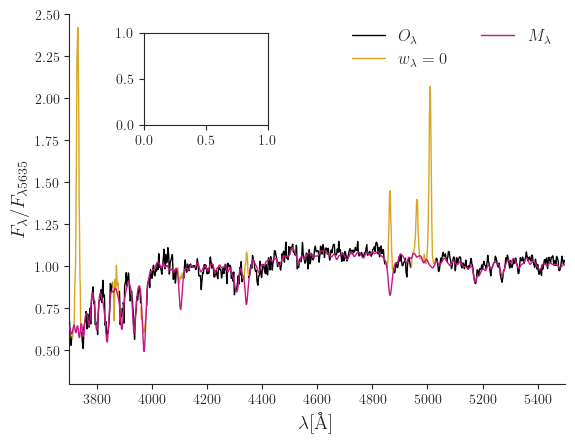

In [5]:
from starlight_toolkit.plotting import plot_spec_simple, plot_sfh
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

ax = plot_spec_simple('../test_data/NGC_0855.out', wl_range=[3700, 5500],
                      syn_color='mediumvioletred', syn_lw=1, obs_color='k', obs_lw=1,
                      w0_color='goldenrod', plot_error=False, label_fontsize=14)

plt.legend(ncol=2, frameon=False, fontsize=12)
plt.ylim(0.3, 2.5)

ax_inset = ax.inset_axes([0.15, 0.7, 0.25, 0.25])

plot_sfh('../test_data/NGC_0855.out', ax=ax_inset)

sns.despine()